In [98]:
import geopandas as gpd
import matplotlib as plt
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

class community_map:
    """makes an object of the map of the shape file"""
    
    def __init__(self, shpFilePath):
        """ shpFilePath: Accept the filepath of the shapefile"""
        
        self._fp = shpFilePath
        self._geodf_Map = gpd.read_file(shpFilePath)
        #adding my own column name for storing similarity, default value=0
        #self._geodf_Map['my_similarity'] = 0
      

    def showData(self, iColName=[]):
        """Shows the geoDataframe of the map.Takes column name in a list, by default it shows all the Columns"""
        
        if len(iColName) == 0:
            df = pd.DataFrame(self._geodf_Map)
            print(self._geodf_Map)
        else:
            df = pd.DataFrame(self._geodf_Map,columns=iColName)
            print(df)
        
        
    def plotMap(self,iColorMap="Reds",iAttr='my_similarity'):
        """plots the map that is present in the object"""
        
        print (iAttr)
        ax = self._geodf_Map.plot(column=iAttr,cmap=iColorMap,figsize=(30,10),
                                  linewidth=1,k=9,edgecolor='black')

    def fillSimilarityCol(self, inSimilarityFP, inComm):
        """ this function fills the column my_similarity which is created in the constructor,
            inSimilarityFP: input parameter which takes the file path of the similarity csv file for the community.
            inComm: Community number whose similarity map we want to find out
            return Value: returns the newcolumn Name
        """
        
        #simdf = pd.read_csv(inSimilarityFP, names = ["similarity", "src", "dst"])
        #simdf = pd.read_csv(inSimilarityFP)
        y = np.loadtxt (inSimilarityFP, delimiter=',')
        y[inComm, 1:] = y[inComm, 1:] / 100
        a = y[inComm, :-1] * 256
        #print (inComm)
        #print (simdf.iloc[inComm, :])
        #print (simdf.head)
        #y = simdf.iloc[0, 0] / 100
        print (a)
        newCol = "my_similarity_" + str(inComm)
        print (self._geodf_Map.shape)
        print (a.shape)
        self._geodf_Map[newCol] = a
        
        return newCol
        
        #print (simdf.head)
#         commdf = self._geodf_Map  #to be on safe side we are making a copy
        #print(commdf.columns)

#         arr = []   #to extract all dst,<similarity value> pairs 
#         for i,row in enumerate(simdf['similarity']):
#             if( inComm == simdf.iloc[i]['src']):
#                 dst = simdf.iloc[i]['dst']
#                 sim = simdf.iloc[i]['similarity']
#                 arr.append((dst,sim))

#         for dst in arr:
#             for it,nb in enumerate(commdf.area_num_1):
#                 if(int(nb) == int(dst[0])):
#                     commdf.my_similarity[it] = int(dst[1]*128)
        
#         newCol = "my_similarity_" + str(inComm)
#         self._geodf_Map[newCol] = commdf['my_similarity']
          


[3.14885250e+01 3.08343870e-01 3.06323817e-01 2.61726781e-01
 2.30921445e-01 2.96002800e-01 2.57111116e-01 3.16882978e-01
 1.41111148e-01 2.28306016e-01 2.16924042e-01 1.46339856e-01
 1.96803137e-01 2.53208175e-01 3.07377926e-01 2.86044332e-01
 2.68854506e-01 1.92475999e-01 2.91900598e-01 2.51500093e-01
 2.73786805e-01 3.09158580e-01 3.40171487e-01 3.09933096e-01
 3.27031251e-01 3.05447635e-01 2.91163201e-01 3.16445723e-01
 3.04090051e-01 2.92170748e-01 2.77930606e-01 2.95255700e-01
 2.57173862e-01 2.34891989e-01 2.78259003e-01 1.90100109e-01
 2.21291837e-01 2.70192944e-01 2.18658708e-01 2.86359209e-01
 2.22133351e-01 2.97939103e-01 3.15925333e-01 3.02308667e-01
 2.46077032e-01 3.09146643e-01 1.65263065e-01 2.45869593e-01
 3.17408529e-01 2.27884841e-01 2.81069376e-01 2.56702387e-01
 2.98035056e-01 2.27496422e-01 1.92984504e-01 2.60959886e-01
 2.33548420e-01 2.71547427e-01 2.11655045e-01 2.55159000e-01
 2.97918315e-01 2.11975854e-01 2.57182912e-01 2.25142658e-01
 2.44777522e-01 3.027625

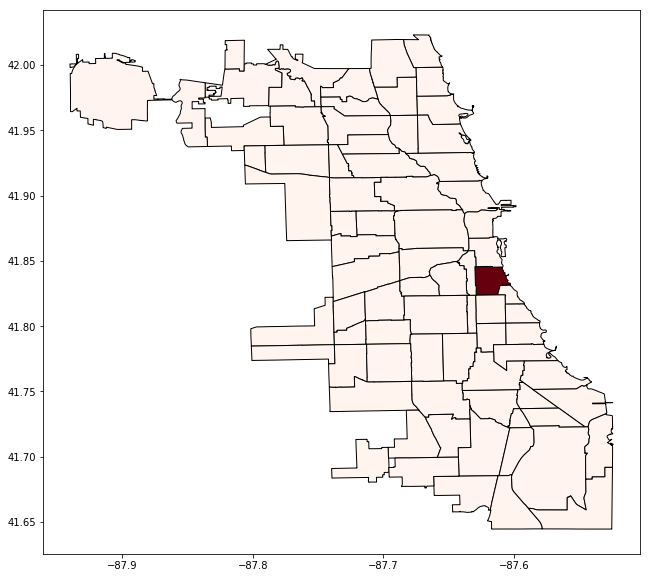

In [103]:
comm_fp = "../../Data/Static/Boundaries_Community_Areas/geo_export_8ae496a0-1182-4961-8fd2-474ae91317e2.shp"

community = community_map(comm_fp)
#to See the raw data in the object
#attr = ['area_num_1','my_similarity']
#community.showData()

#colMap = "viridis"
attr = 'my_similarity'
#community.plotMap()

sim_fp = "../../Data/2015/similarity.csv"
#sim_fp = "../../Data/Total_Data/Output/similarity2011.csv"
tmp = community.fillSimilarityCol(sim_fp, 76)
community.showData()
community.plotMap(iAttr=tmp)
#community.showData()
#community.plotMap(colMap,iAttr='my_similarity')

#tmp = community.fillSimilarityCol(sim_fp,76)
#community.plotMap(colMap,iAttr=tmp)

In [44]:

mpleaf.display(fig=ax.figure, crs=commdf.crs,tiles='cartodb_positron')
mpleaf.show(fig=ax.figure,crs=commun.crs,tiles='osm')


NameError: name 'mpleaf' is not defined